In [3]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import sklearn.datasets as datasets

In [4]:
#iris=datasets.load_iris()
#df=pd.DataFrame(iris.data,columns=iris.feature_names)
df=pd.read_csv("Iris.csv")


In [5]:
df["Species"] = df["Species"].astype('category')
df['Species']=df['Species'].cat.codes
df=df.drop('Id',axis=1)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [7]:
from yellowbrick.classifier import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize']= (12,8)

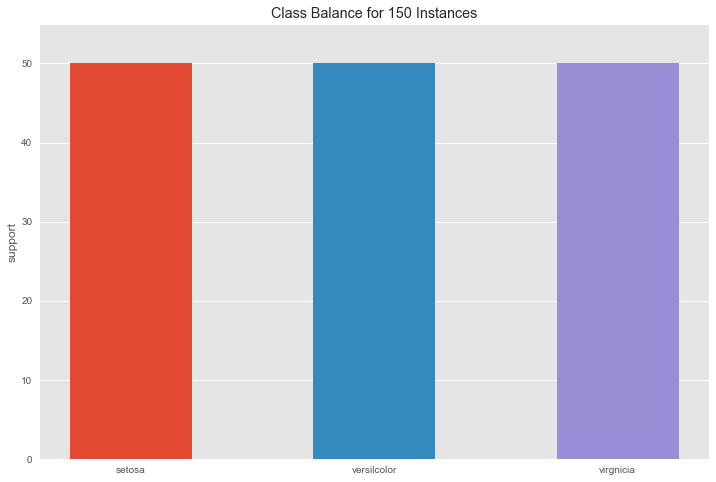

In [8]:
visualizer=ClassBalance(labels=['setosa','versilcolor','virgnicia']).fit(df.Species)
visualizer.show()

In [9]:
X=df.loc[: ,df.columns!='Species']
y=df.Species

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import SVG
from graphviz import Source
from graphviz import Graph
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mping
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
#import os
#os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [40]:
from graphviz import Source
from sklearn import tree

In [50]:
@interact
def plot_tree(crit=['gini','entropy'], 
              split=['best','random'], 
              depth=IntSlider(min=2,max=30,value=3, continuous_update=False),
              min_split=IntSlider(min=3,max=5,value=3, continuous_update=False), 
              min_leaf=IntSlider(min=2,max=5,value=2, continuous_update=False)):
    estimator = DecisionTreeClassifier(random_state=0,
                                 criterion=crit, 
                                 splitter=split, 
                                 max_depth=depth,
                                 min_samples_split=min_split, 
                                 min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    print('decision tree training accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('decision tree testing accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    
    graph = Source(tree.export_graphviz(estimator,out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['setosa','versicolor','virgnicia'],
                                        filled=True))
    
    display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

We get:
decision tree training accuracy: 0.967
decision tree testing accuracy: 0.933

In [51]:
@interact
def plot_tree(crit=['gini','entropy'], 
              bootstrap=['True','False'], 
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False), 
              min_leaf=IntSlider(min=2,max=5,value=2, continuous_update=False)):
    estimator = RandomForestClassifier(random_state=0,
                                 criterion=crit, 
                                 bootstrap=bootstrap,
                                 n_estimators=forests, 
                                 max_depth=depth,
                                 min_samples_split=min_split, 
                                 min_samples_leaf=min_leaf,
                                 n_jobs=-1,
                                 verbose=False).fit(X_train,y_train)
    
    estimator.fit(X_train, y_train)
    print('Random Forest training accuracy: {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Random Forest testing accuracy: {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    
    num_tree=estimator.estimators_[0]
    print('Visualising tree:',0)
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['setosa','versicolor','virgnicia'],
                                        filled=True))
   
    display(Image(data=graph.pipe(format='png')))
    return estimator


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

We get:
Random Forest training accuracy: 0.967
Random Forest testing accuracy: 0.933

In [52]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize']=(12,8)
plt.style.use("ggplot")

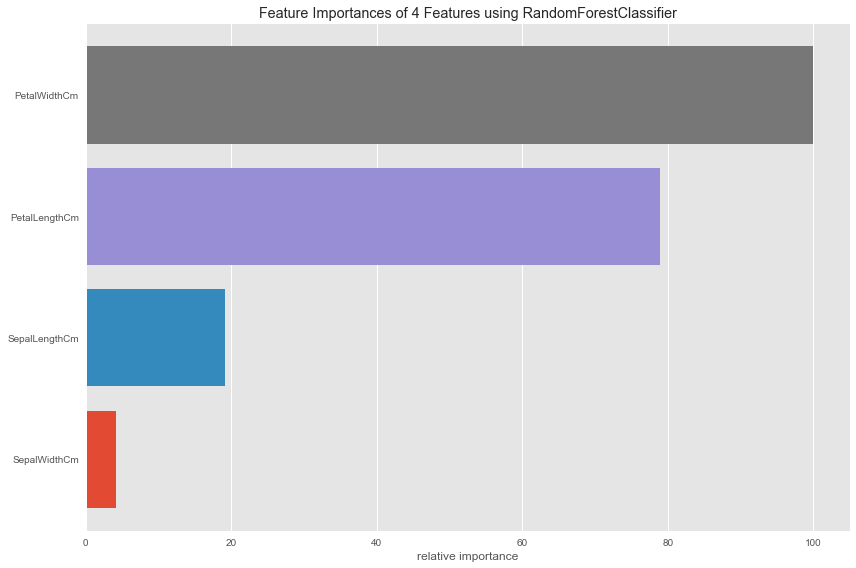

In [53]:
rf=RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=False,
            warm_start=False)


viz = FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show()

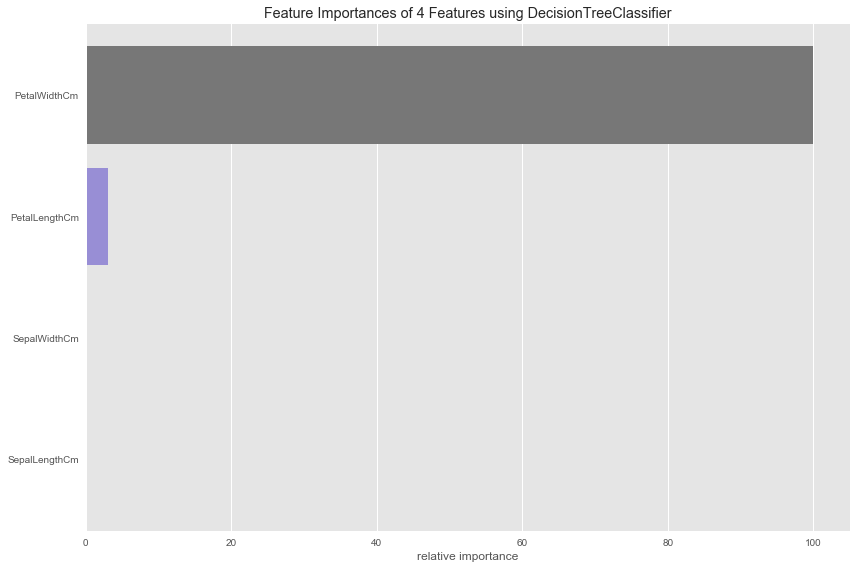

In [54]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train,y_train)
viz.show()

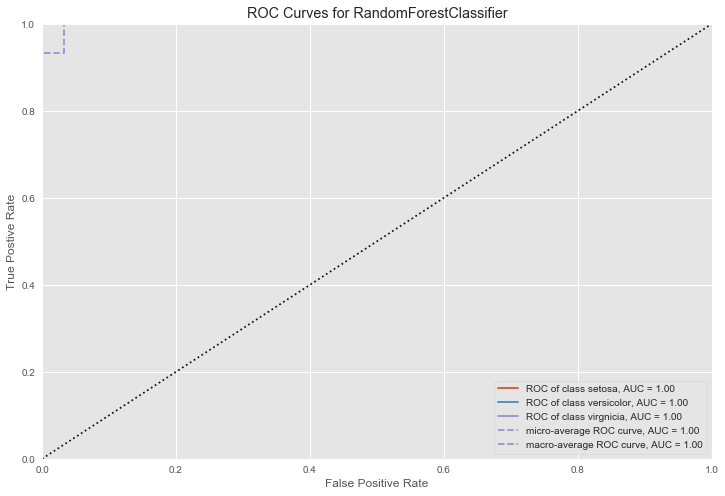

In [55]:
from yellowbrick.classifier import ROCAUC

visualizer= ROCAUC(rf, classes=['setosa','versicolor','virgnicia'])

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();

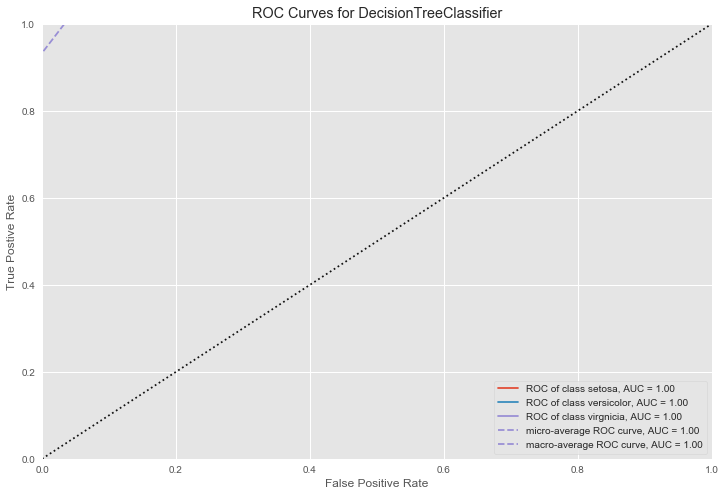

In [56]:
from yellowbrick.classifier import ROCAUC

visualizer= ROCAUC(dt, classes=['setosa','versicolor','virgnicia'])

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof();